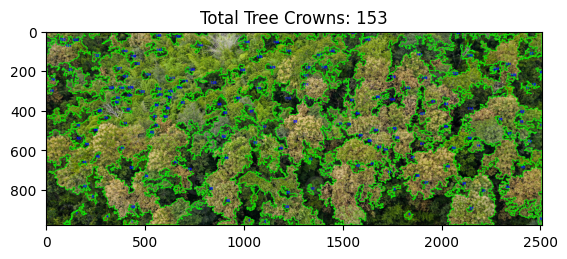

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('image1.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

tree_crown_count = 0
for i, contour in enumerate(contours):
    if cv2.contourArea(contour) > 500: 
        tree_crown_count += 1
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(image, str(tree_crown_count), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        else:
            cX, cY = 0, 0
            cv2.putText(image, str(tree_crown_count), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Total Tree Crowns: {tree_crown_count}')
plt.show()
